In [19]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
x_train.shape

(60000, 28, 28)

- Since the data has no color channel , we will have to use reshape on the data.
- We will use gray_r to reverse the color.

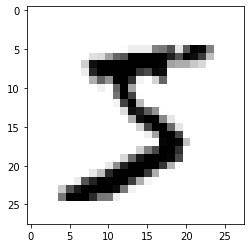

In [6]:
# We will try to print a single image.
single_img = x_train[0]
plt.imshow(single_img,cmap = 'gray_r')

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- The y_train is filled with values between 0-9.
- We will use one-hot encoder on the target as it will convert the label into categorical data. If we dont convert the labels then the Neural network will treat it as a regression problem.
- The second arguement is the number of classes in to_categorical.
- The one-Hot encoder works especially well with the sigmoid function.

In [9]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

- To normailze the image pixels manually just divide with the max value.
- After scaling the data we need to reshape it.
- x_test has only 10000 images .

In [10]:
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

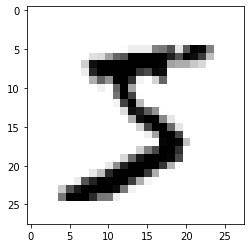

In [11]:
scaled_img = x_train[0]
plt.imshow(scaled_img,cmap='gray_r')

- We will reshape the data to give it one color channel as it is a grayscale image dataset.

In [12]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

## Now we will create the model.

In [14]:
model = Sequential()

# Conv Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

#Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

#Fully connected layer
model.add(Flatten())

#Dense Layer
model.add(Dense(128,activation='relu'))

#Output Layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 29s 15ms/step - loss: 0.1411 - accuracy: 0.9577
Epoch 2/2
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0487 - accuracy: 0.9848


In [17]:
model.metrics_names

['loss', 'accuracy']

In [18]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0432 - accuracy: 0.9856


[0.04322776570916176, 0.9855999946594238]

In [20]:
# The resulting predictions will be in the original format.
preds = model.predict_classes(x_test)
print(classification_report(y_test,preds))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.96      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg    